In [39]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [57]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras.utils import np_utils
import tensorflow

In [80]:
from keras.models import load_model

In [41]:
SUV_path = "/home/all_projects/data/car_data/train/SUV/"
Sedan_path = "/home/all_projects/data/car_data/train/sedan/"

In [42]:
#SUV = 1
#sedan = 0

In [43]:
images = np.zeros((2757,100,100))
labels = np.zeros((2757,1))

In [44]:
suvs = os.listdir(SUV_path)
sedans = os.listdir(Sedan_path)

In [45]:
for ix,iy in enumerate(suvs):
    img = cv2.imread(SUV_path + iy, 0)
    img = cv2.resize(img, (100,100))
    images[ix] = img
    labels[ix] = 1

In [46]:
for ix,iy in enumerate(sedans):
    img = cv2.imread(Sedan_path + iy, 0)
    img = cv2.resize(img, (100,100))
    images[ix+len(suvs)] = img

In [47]:
images, labels = shuffle(images, labels, random_state=0)

In [48]:
y = np_utils.to_categorical(labels)

In [49]:
images.shape

(2757, 100, 100)

In [50]:
y.shape

(2757, 2)

In [53]:
images = images/255.0

In [55]:
X = images.reshape(-1,100,100,1)

In [56]:
print (X.shape,y.shape)

((2757, 100, 100, 1), (2757, 2))


In [74]:
model = Sequential()
model.add(Convolution2D(16,(3,3),activation='relu', input_shape=(100,100,1)))
model.add(BatchNormalization())
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(32, (5,5),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(8, (3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 98, 98, 16)        160       
_________________________________________________________________
batch_normalization_41 (Batc (None, 98, 98, 16)        64        
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 96, 96, 32)        4640      
_________________________________________________________________
batch_normalization_42 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
dropout_15 (Dropout)         (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 44, 44, 64)        51264     
__________

In [75]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
hist = model.fit(X,y,
                 epochs = 2,
                 shuffle = True,
                 batch_size = 128)

Epoch 1/2
2757/2757 [==============================] - 42s 15ms/step - loss: 0.3636 - acc: 0.8549
Epoch 2/2
2757/2757 [==============================] - 40s 15ms/step - loss: 0.3223 - acc: 0.8709


In [79]:
model.save("cars_model.h5")

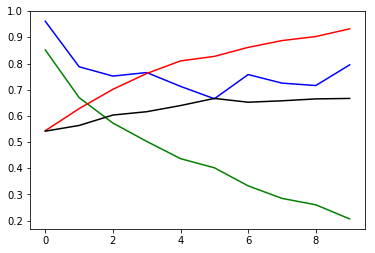

In [72]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()

In [ ]:
model.predict_classes